In [1]:
import training_module as TM
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

2022-10-08 03:54:57.340730: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-08 03:54:57.340763: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data=TM.preprocess('../data/GM12878_hg19_chip_seq/')

Loading data from: ../data/GM12878_hg19_chip_seq/
Using 11 tracks: ['H2AFZ' 'H3K27ac' 'H3K27me3' 'H3K36me3' 'H3K4me1' 'H3K4me2' 'H3K4me3'
 'H3K79me2' 'H3K9ac' 'H3K9me3' 'H4K20me1']
Number of chromosomes:22

Normalizing data...
done!


In [3]:
xtrain,ytrain=data.gen_input_vec(5)

print(xtrain.shape,ytrain.shape)


(51784, 121) (51784,)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(xtrain, ytrain, test_size=0.4, random_state=1913)

In [5]:
for val in np.unique(Y_test):
    print(val, list(map(data.int_to_type.get, [val]))[0],np.where(Y_test==val)[0].shape[0]/Y_test.shape[0])

0.0 A1 0.1450226899681375
1.0 A2 0.22511344984068746
2.0 B1 0.1310224968620257
3.0 B2 0.1680023172733417
4.0 B3 0.33083904605580766


In [6]:
model=TM.CompPred()

2022-10-08 03:55:26.487888: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-08 03:55:26.489026: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-08 03:55:26.489071: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c19n001.mt3.pod.penguincomputing.com): /proc/driver/nvidia/version does not exist
2022-10-08 03:55:26.489445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model(xtrain)

<tf.Tensor: shape=(51784, 5), dtype=float32, numpy=
array([[0.        , 0.26884913, 0.13494445, 0.        , 0.12873058],
       [0.        , 0.32671872, 0.11445565, 0.        , 0.17086133],
       [0.        , 0.36527574, 0.14602436, 0.        , 0.16333556],
       ...,
       [0.        , 0.4756549 , 0.22159533, 0.        , 0.20048085],
       [0.        , 0.5521052 , 0.1840596 , 0.        , 0.28214297],
       [0.        , 0.23434035, 0.09946824, 0.        , 0.18117252]],
      dtype=float32)>

In [8]:
model.summary()

Model: "comp_pred"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  7808      
                                                                 
 dense_1 (Dense)             multiple                  8320      
                                                                 
 dense_2 (Dense)             multiple                  8256      
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_3 (Dense)             multiple                  325       
                                                                 
Total params: 24,709
Trainable params: 24,709
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=["accuracy"],
)

In [10]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=60, validation_split=0.2)

Epoch 1/60
389/389 [==============================] - 1s 3ms/step - loss: 1.2972 - accuracy: 0.4872 - val_loss: 1.1114 - val_accuracy: 0.5575
Epoch 2/60
389/389 [==============================] - 1s 3ms/step - loss: 1.1052 - accuracy: 0.5612 - val_loss: 1.0149 - val_accuracy: 0.5875
Epoch 3/60
389/389 [==============================] - 1s 3ms/step - loss: 1.0327 - accuracy: 0.5867 - val_loss: 0.9696 - val_accuracy: 0.6221
Epoch 4/60
389/389 [==============================] - 1s 3ms/step - loss: 1.0001 - accuracy: 0.5985 - val_loss: 0.9452 - val_accuracy: 0.6204
Epoch 5/60
389/389 [==============================] - 1s 3ms/step - loss: 0.9671 - accuracy: 0.6128 - val_loss: 0.9312 - val_accuracy: 0.6273
Epoch 6/60
389/389 [==============================] - 1s 3ms/step - loss: 0.9510 - accuracy: 0.6207 - val_loss: 0.9182 - val_accuracy: 0.6341
Epoch 7/60
389/389 [==============================] - 1s 3ms/step - loss: 0.9366 - accuracy: 0.6231 - val_loss: 0.9076 - val_accuracy: 0.6389
Epoch 

In [11]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

648/648 - 0s - loss: 0.8131 - accuracy: 0.6929 - 404ms/epoch - 624us/step
Test loss: 0.813107430934906
Test accuracy: 0.6929129958152771


Text(0, 0.5, 'accuracy')

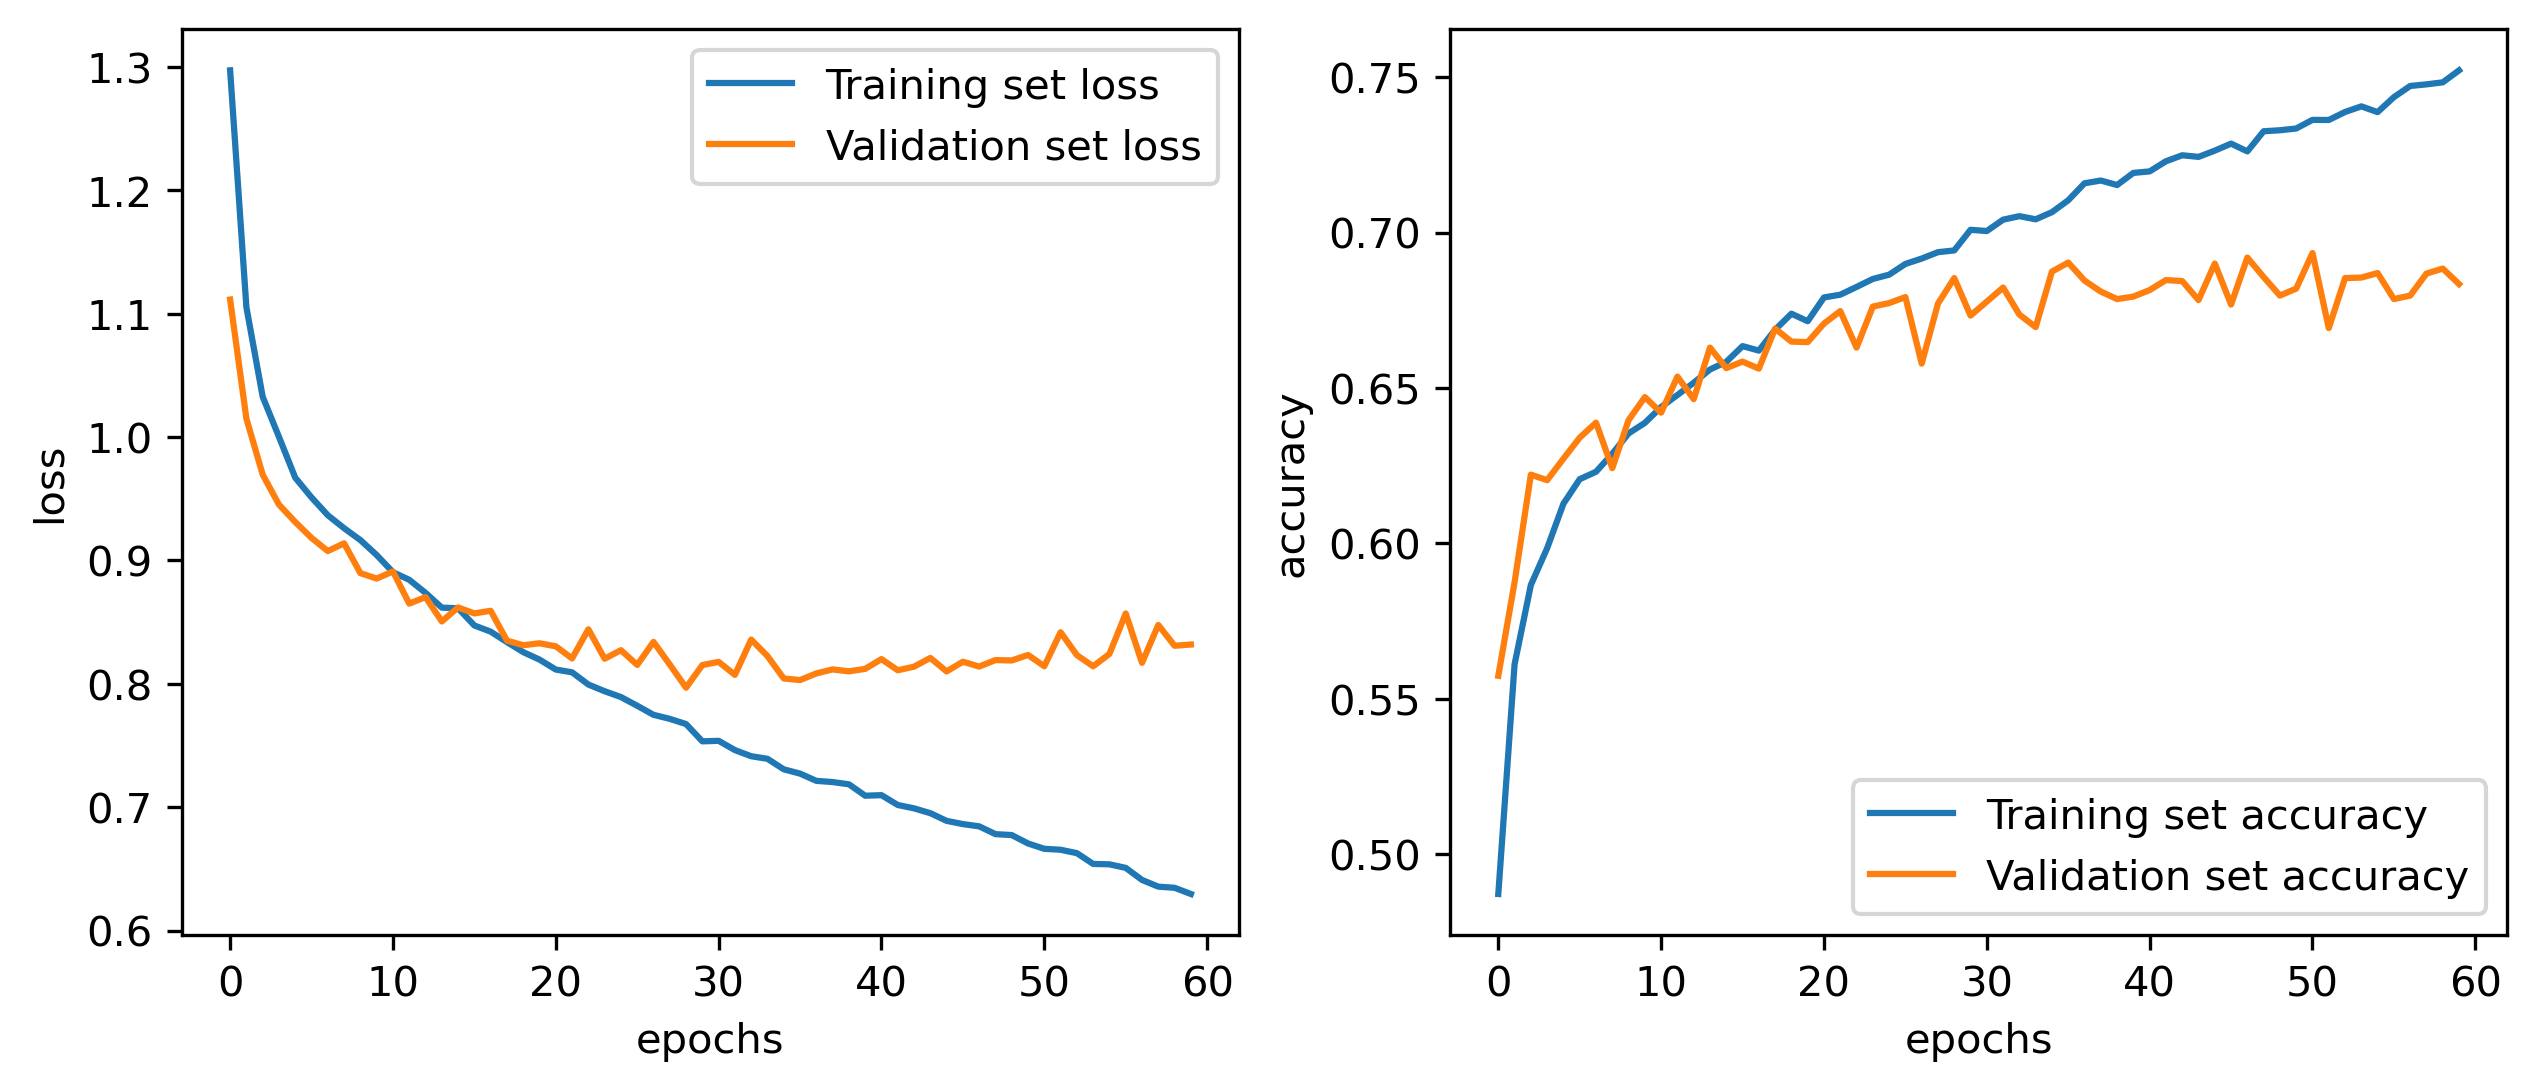

In [12]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,2, figsize=(10,4), dpi=300)

ax[0].plot(history.history['loss'],label="Training set loss")
ax[0].plot(history.history['val_loss'],label="Validation set loss")
ax[1].plot(history.history['accuracy'],label="Training set accuracy")
ax[1].plot(history.history['val_accuracy'],label="Validation set accuracy")

for axi in ax.flatten():
    axi.set_xlabel('epochs')
    axi.legend()
ax[0].set_ylabel('loss')
ax[1].set_ylabel('accuracy')

In [14]:
print(Y_test.shape, X_test.shape)
type_test={}

for val in np.unique(Y_test):
    ind = np.where(Y_test==val)[0]
    X_type=X_test[ind,:]
    Y_type=Y_test[ind]
    name=list(map(data.int_to_type.get, [val]))[0]

    print(name, Y_type.shape, X_type.shape)
    type_test[name] = (X_type,Y_type)

print(type_test.keys())


(20714,) (20714, 121)
A1 (3004,) (3004, 121)
A2 (4663,) (4663, 121)
B1 (2714,) (2714, 121)
B2 (3480,) (3480, 121)
B3 (6853,) (6853, 121)
dict_keys(['A1', 'A2', 'B1', 'B2', 'B3'])


In [15]:
for key in type_test.keys():
    print("Type: ", key)
    test_scores = model.evaluate(type_test[key][0], type_test[key][1], verbose=2)
    print("Test loss:", test_scores[0])
    print("Test accuracy:", test_scores[1])

Type:  A1
94/94 - 0s - loss: 0.9091 - accuracy: 0.6621 - 134ms/epoch - 1ms/step
Test loss: 0.9090942740440369
Test accuracy: 0.6621171832084656
Type:  A2
146/146 - 0s - loss: 0.8269 - accuracy: 0.6693 - 110ms/epoch - 754us/step
Test loss: 0.8268722891807556
Test accuracy: 0.6693115830421448
Type:  B1
85/85 - 0s - loss: 1.1579 - accuracy: 0.6006 - 92ms/epoch - 1ms/step
Test loss: 1.1578859090805054
Test accuracy: 0.6005895137786865
Type:  B2
109/109 - 0s - loss: 1.0340 - accuracy: 0.5187 - 86ms/epoch - 791us/step
Test loss: 1.0339999198913574
Test accuracy: 0.5186781883239746
Type:  B3
215/215 - 0s - loss: 0.5130 - accuracy: 0.8475 - 144ms/epoch - 669us/step
Test loss: 0.5129520893096924
Test accuracy: 0.8475120663642883
